In [111]:
pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
             

In [112]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [113]:
#import basics libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
 

In [114]:
dataset = pd.read_csv('C:/Users/HP/Downloads/Churn_Modelling/Churn_Modelling.csv')

In [115]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
##divide datset into independenrt and dependent dataset
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [117]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [118]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [119]:
##feature engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [120]:
##concatenate there varibles with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [121]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [122]:
X=pd.concat([X,geography,gender],axis=1)

In [123]:
#spliiting dataset and training set and test set
from sklearn.model_selection import  train_test_split

X_test,X_train,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [124]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [125]:
X_train

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [126]:
X_test

array([[ 0.17387901, -0.48804323, -0.04867536, ..., -0.61433742,
         1.74133801, -1.11339196],
       [-2.34671547,  0.26416674, -1.42953664, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-1.21244795, -0.95817446, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       ...,
       [ 0.91955488, -0.39401698, -0.04867536, ..., -0.61433742,
        -0.57427105,  0.8981563 ],
       [-0.63481172, -0.11193825,  1.33218592, ..., -0.61433742,
         1.74133801, -1.11339196],
       [-0.28822998,  0.82832421, -1.42953664, ...,  1.62776996,
        -0.57427105, -1.11339196]])

In [127]:
X_train.shape

(2000, 11)

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [129]:
##intilize the ann
classifier=Sequential()

In [167]:
##adding the input layer 
classifier.add(Dense(units=11,activation='relu'))


In [168]:
classifier.add(Dense(units=7,activation='relu'))

In [169]:
classifier.add(Dense(units=6,activation='relu'))

In [170]:
##adding output layer
classifier.add(Dense(1,activation="sigmoid"))

In [171]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [172]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [173]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [174]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
134/134 [==============================] - 7s 33ms/step - loss: 0.6266 - accuracy: 0.7872 - val_loss: 0.5566 - val_accuracy: 0.7912
Epoch 2/1000
134/134 [==============================] - 0s 4ms/step - loss: 0.5314 - accuracy: 0.7872 - val_loss: 0.5126 - val_accuracy: 0.7912
Epoch 3/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.7872 - val_loss: 0.5120 - val_accuracy: 0.7912
Epoch 4/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7872 - val_loss: 0.5121 - val_accuracy: 0.7912
Epoch 5/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7872 - val_loss: 0.5124 - val_accuracy: 0.7912
Epoch 6/1000
134/134 [==============================] - 0s 4ms/step - loss: 0.5172 - accuracy: 0.7872 - val_loss: 0.5122 - val_accuracy: 0.7912
Epoch 7/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.7872 - val_loss: 0.5122 - val_accuracy

In [175]:
# list all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

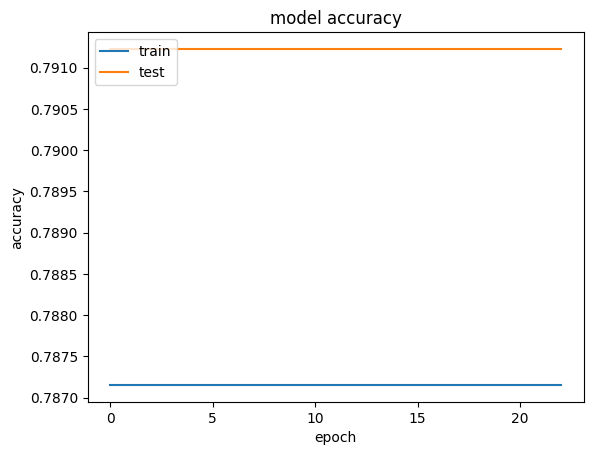

In [176]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

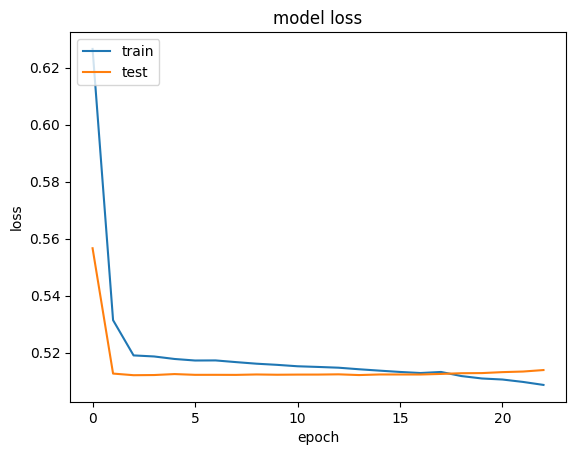

In [177]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [178]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

250/250 [==============================] - 1s 1ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

In [ ]:
#get the weight
classifier.get_weight()